<a href="https://colab.research.google.com/github/reidnersousa/IFB_OPT3_Machine-Learning_2023-2/blob/main/trabalho_2_OO_entregar_esse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

class LSTMData:
  def __init__(self, arquivo_nome ,tamanho_sequencia=60):
    self.arquivo_nome = arquivo_nome
    self.tamanho_sequencia = tamanho_sequencia
    self.scaler = MinMaxScaler(feature_range=(0,1))
    self.carrega_dados()
    self.dividir_treino_test()
    self.set_scaled() ### melhorando a velocidade do modelo


    self.separa_dados()


  def carrega_dados(self):
    self.dados = pd.read_csv(self.arquivo_nome)
    self.dados.interpolate(method='linear',inplace=True) ## caso tenham valores nulos


  def dividir_treino_test(self):
    self.dados_treino    = self.dados.iloc[:-446,:]
    self.dados_teste     = self.dados.iloc[-446:,:]
    self.dados_validacao = self.dados.iloc[-196:,:]

  def set_scaled(self):
    self.training_set = self.dados_treino.iloc[:,1:2].values

    self.training_set_scaled = self.scaler.fit_transform(self.training_set)

  def separa_dados(self):
    self.X_train =[]
    self.y_train =[]
    for i in range(self.tamanho_sequencia,len(self.training_set_scaled)):
      self.X_train.append(self.training_set_scaled[i-self.tamanho_sequencia:i,0])
      self.y_train.append(self.training_set_scaled[i,0])
    self.X_train,self.y_train = np.array(self.X_train),np.array(self.y_train)
    self.X_train = np.reshape(self.X_train,(self.X_train.shape[0],self.X_train.shape[1],1))

  def pega_dados(self):
    return self.X_train , self.y_train




url = 'https://raw.githubusercontent.com/reidnersousa/Dataset/main/5_acoes_itau_Reidner.csv'
url2  ='https://raw.githubusercontent.com/reidnersousa/Dataset/main/PETR3.SA_2000.csv'
#dataset = pd.read_csv(url)

dataset = LSTMData(url)
X_train , y_train = dataset.pega_dados()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dense
from keras.src.layers.regularization.spatial_dropout3d import Dropout

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

class RedeLSTM:
  def __init__(self,X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train


    self.modelo = Sequential()
    self.criar_modelo()
    self.compilar_modelo()

  def criar_modelo(self):
    self.modelo.add(LSTM(units =50 , return_sequences=True ,
                         input_shape=(self.X_train.shape[1],1)))

    self.modelo.add(Dropout(0.2))
    self.modelo.add(LSTM(units =50, return_sequences= True))
    self.modelo.add(Dropout(0.2))
    self.modelo.add(LSTM(units =50, return_sequences= True))
    self.modelo.add(Dropout(0.2))
    self.modelo.add(LSTM(units =50))
    self.modelo.add(Dropout(0.2))
    self.modelo.add(Dense(units =1 ))

  def compilar_modelo(self):
    self.modelo.compile(optimizer='adam',loss='mean_squared_error')

  def treina_modelo(self):
    self.historico = self.modelo.fit(self.X_train,self.y_train,epochs =50, batch_size=32,shuffle=True , verbose =0)

  def precos_reais_modelo(self,dataset_test):
    self.real_stock_price = dataset_test.iloc[:,1:2].values
   # self.vali_stock_price =

  def join_dataset_treino_mais_dataset_teste(self,dt_treino,dt_teste):
    self.dataset_teste = dt_teste
    self.dataset_total = pd.concat((dt_treino['Open'],dt_teste['Open']) ,axis =0)

  def definindo_inputs(self):
      self.inputs = self.dataset_total[len(self.dataset_total) - len(self.dataset_teste)-60:].values
      self.inputs = self.inputs.reshape(-1,1)

  def transform_inputs(self,sc):
      self.sc = sc
      self.inputs = self.sc.transform(self.inputs)

  def criando_X_test(self):
      self.X_test = []
      for i in range(60,len(self.inputs)):
        self.X_test.append(self.inputs[i-60:i,0])

      self.X_test =  np.array(self.X_test)

      self.X_test = np.reshape(self.X_test,(self.X_test.shape[0],self.X_test.shape[1],1))

  def fazendo_predict(self):
    self.predicted_stock_price = self.modelo.predict(self.X_test)
    print(self.predicted_stock_price.ndim)

  def revertendo_dados(self):
    self.predicted_stock_price = self.sc.inverse_transform(self.predicted_stock_price)

  def plot_stocks(self):

    validacao_price =10
    plt.plot(self.real_stock_price, color = 'red', label = 'Dados Reais de Açõesda Magazine Luiza')
    plt.plot(self.predicted_stock_price, color = 'blue', label = 'Dados Previstosde Ações da Magazine Luiza')
    plt.plot(validacao_price, color ='green')
    plt.title('Previsão de Preços de Ações')
    plt.xlabel('Tempo')
    plt.ylabel('Preços de Ações da Magazine Luiza')
    plt.legend()
    plt.show()



14/14 [==============================] - 2s 44ms/step
2


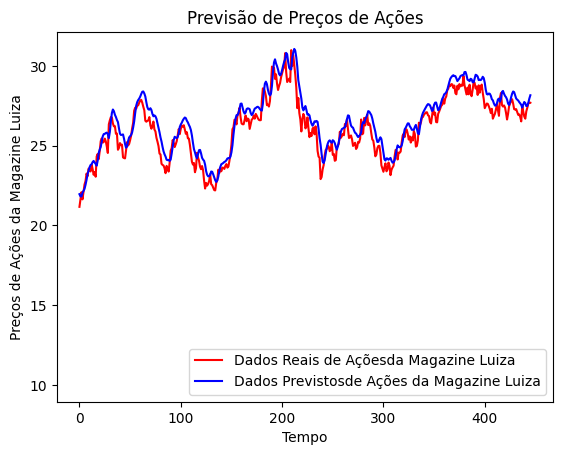

In [ ]:
rede = RedeLSTM(X_train,y_train)
rede.treina_modelo()
rede.join_dataset_treino_mais_dataset_teste(dataset.dados_treino,dataset.dados_teste)
rede.precos_reais_modelo(dataset.dados_teste)
rede.definindo_inputs()
rede.transform_inputs(dataset.scaler)

rede.criando_X_test()
rede.fazendo_predict()
rede.revertendo_dados()
rede.plot_stocks()

Fazendo a Previsão

In [ ]:
print(len(dataset.training_set))


5260


In [ ]:
print(len(rede.inputs))

506
